In [1138]:
#@title Table 1 Cleaning

In [1139]:
import pandas as pd
import numpy as np
from google.colab import drive
tb_1 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx", sheet_name ="Table 1")
tb_1.drop(tb_1.index[0:15], inplace=True)
tb_1.columns = ["Sort order", "Major area, region, country or area of destination", "Notes",
               "Country code", "Type of data (a)", "both_sexs1990", "both_sexs1995", "both_sexs2000", "both_sexs2005", "both_sexs2010",
               "both_sexs2015", "male1990", "male1995", "male2000", "male2005", "male2010", "male2015", "female1990", "female1995", "female2000",
               "female2005", "female2010", "female2015"]
tb_1.head(5)
tb_1.tail(5)


,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),both_sexs1990,both_sexs1995,both_sexs2000,both_sexs2005,both_sexs2010,...,male2000,male2005,male2010,male2015,female1990,female1995,female2000,female2005,female2010,female2015
275,261,Samoa,NaN,882,B,3357,4694,5998,5746,5122.0,...,3101,2940,2594.0,2469.0,1586,2243,2897,2806,2528.0,2460.0
276,262,Tokelau,NaN,772,B,270,266,262,258,429.0,...,144,133,206.0,233.0,120,119,118,125,223.0,254.0
277,263,Tonga,NaN,776,B,2911,3274,3684,4301,5022.0,...,1981,2328,2727.0,3127.0,1423,1556,1703,1973,2295.0,2604.0
278,264,Tuvalu,NaN,798,C,318,263,217,183,154.0,...,121,101,85.0,78.0,138,115,96,82,69.0,63.0
279,265,Wallis and Futuna Islands,NaN,876,B,1402,1680,2015,2365,2776.0,...,1018,1194,1401.0,1438.0,676,821,997,1171,1375.0,1411.0


In [1140]:
tb_1=tb_1.melt(id_vars=["Sort order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name=["Genderandyear"],value_name="International migrant stock at mid-year")
tb_1.head(5)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Genderandyear,International migrant stock at mid-year
0,1,WORLD,NaN,900,NaN,both_sexs1990,152563212
1,2,Developed regions,(b),901,NaN,both_sexs1990,82378628
2,3,Developing regions,(c),902,NaN,both_sexs1990,70184584
3,4,Least developed countries,(d),941,NaN,both_sexs1990,11075966
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both_sexs1990,59105261


In [1141]:
tb_1 = tb_1.assign(Gender = lambda x: x.Genderandyear.str[0].astype(str), Year = lambda x: x.Genderandyear.str[-4:].astype(str))
tb_1 = tb_1.drop("Genderandyear", axis = 1)
tb_1.head(5)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
0,1,WORLD,NaN,900,NaN,152563212,b,1990
1,2,Developed regions,(b),901,NaN,82378628,b,1990
2,3,Developing regions,(c),902,NaN,70184584,b,1990
3,4,Least developed countries,(d),941,NaN,11075966,b,1990
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,b,1990


In [1142]:
tb_1 = tb_1.replace(to_replace=["f", "b", "m"], value=["female", "both sexes", "male"])
tb_1.head(4770)






,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year,Gender,Year
0,1,WORLD,NaN,900,NaN,152563212,both sexes,1990
1,2,Developed regions,(b),901,NaN,82378628,both sexes,1990
2,3,Developing regions,(c),902,NaN,70184584,both sexes,1990
3,4,Least developed countries,(d),941,NaN,11075966,both sexes,1990
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,both sexes,1990
...,...,...,...,...,...,...,...,...
4765,261,Samoa,NaN,882,B,2460.0,female,2015
4766,262,Tokelau,NaN,772,B,254.0,female,2015
4767,263,Tonga,NaN,776,B,2604.0,female,2015
4768,264,Tuvalu,NaN,798,C,63.0,female,2015


In [1143]:
cols_tb_1 = tb_1.columns.tolist()
cols_tb_1.insert(7,cols_tb_1.pop(cols_tb_1.index('International migrant stock at mid-year')))   # I change the column position
tb_1 = tb_1[cols_tb_1]       


In [1144]:
tb_1


,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year
0,1,WORLD,NaN,900,NaN,both sexes,1990,152563212
1,2,Developed regions,(b),901,NaN,both sexes,1990,82378628
2,3,Developing regions,(c),902,NaN,both sexes,1990,70184584
3,4,Least developed countries,(d),941,NaN,both sexes,1990,11075966
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both sexes,1990,59105261
...,...,...,...,...,...,...,...,...
4765,261,Samoa,NaN,882,B,female,2015,2460.0
4766,262,Tokelau,NaN,772,B,female,2015,254.0
4767,263,Tonga,NaN,776,B,female,2015,2604.0
4768,264,Tuvalu,NaN,798,C,female,2015,63.0


In [1145]:
#@title Table 2 Cleaning


In [1146]:
import pandas as pd
import numpy as np
from google.colab import drive
tb_2 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx", sheet_name ="Table 2")
tb_2.drop(tb_2.index[0:15], inplace=True)
tb_2.columns = ["Sort order", "Major area, region, country or area of destination", "Notes",
               "Country code", "both_sexs1990", "both_sexs1995", "both_sexs2000", "both_sexs2005", "both_sexs2010",
               "both_sexs2015", "male1990", "male1995", "male2000", "male2005", "male2010", "male2015", "female1990", "female1995", "female2000",
               "female2005", "female2010", "female2015"]

In [1147]:
tb_2=tb_2.melt(id_vars=["Sort order","Major area, region, country or area of destination","Notes","Country code"],var_name=["Genderandyear"],value_name="Total population of both sexes at mid-year (thousands)")



In [1148]:
tb_2 = tb_2.assign(Gender = lambda x: x.Genderandyear.str[0].astype(str), Year = lambda x: x.Genderandyear.str[-4:].astype(str))
tb_2 = tb_2.drop("Genderandyear", axis = 1)

In [1149]:
tb_2 = tb_2.replace(to_replace=["f", "b", "m"], value=["female", "both sexes", "male"])
tb_2.head(4770)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Total population of both sexes at mid-year (thousands),Gender,Year
0,1,WORLD,NaN,900,5309667.699,both sexes,1990
1,2,Developed regions,(b),901,1144463.062,both sexes,1990
2,3,Developing regions,(c),902,4165204.637,both sexes,1990
3,4,Least developed countries,(d),941,510057.629,both sexes,1990
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,both sexes,1990
...,...,...,...,...,...,...,...
4765,261,Samoa,NaN,882,93.584,female,2015
4766,262,Tokelau,NaN,772,..,female,2015
4767,263,Tonga,NaN,776,52.931,female,2015
4768,264,Tuvalu,NaN,798,..,female,2015


In [1150]:
cols_tb_2 = tb_2.columns.tolist()
cols_tb_2.insert(7,cols_tb_2.pop(cols_tb_2.index('Total population of both sexes at mid-year (thousands)')))   # I change the column position
tb_2 = tb_2[cols_tb_2]       


In [1151]:
#@title Table 3 Cleaning


In [1152]:
import pandas as pd
import numpy as np
from google.colab import drive
tb_3 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx", sheet_name ="Table 3")
tb_3.drop(tb_3.index[0:15], inplace=True)
tb_3.columns = ["Sort order", "Major area, region, country or area of destination", "Notes",
               "Country code", "Type of data (a)", "both_sexs1990", "both_sexs1995", "both_sexs2000", "both_sexs2005", "both_sexs2010",
               "both_sexs2015", "male1990", "male1995", "male2000", "male2005", "male2010", "male2015", "female1990", "female1995", "female2000",
               "female2005", "female2010", "female2015"]

In [1153]:
tb_3=tb_3.melt(id_vars=["Sort order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name=["Genderandyear"],value_name="International migrant stock as a percentage of the total population")
tb_3.head(5)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Genderandyear,International migrant stock as a percentage of the total population
0,1,WORLD,NaN,900,NaN,both_sexs1990,2.87331
1,2,Developed regions,(b),901,NaN,both_sexs1990,7.198015
2,3,Developing regions,(c),902,NaN,both_sexs1990,1.685021
3,4,Least developed countries,(d),941,NaN,both_sexs1990,2.171513
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both_sexs1990,1.617042


In [1154]:
tb_3 = tb_3.assign(Gender = lambda x: x.Genderandyear.str[0].astype(str), Year = lambda x: x.Genderandyear.str[-4:].astype(str))
tb_3 = tb_3.drop("Genderandyear", axis = 1)

In [1155]:
tb_3 = tb_3.replace(to_replace=["f", "b", "m"], value=["female", "both sexes", "male"])
tb_3.head(4770)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population,Gender,Year
0,1,WORLD,NaN,900,NaN,2.87331,both sexes,1990
1,2,Developed regions,(b),901,NaN,7.198015,both sexes,1990
2,3,Developing regions,(c),902,NaN,1.685021,both sexes,1990
3,4,Least developed countries,(d),941,NaN,2.171513,both sexes,1990
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,both sexes,1990
...,...,...,...,...,...,...,...,...
4765,261,Samoa,NaN,882,B,2.628654,female,2015
4766,262,Tokelau,NaN,772,B,..,female,2015
4767,263,Tonga,NaN,776,B,4.919612,female,2015
4768,264,Tuvalu,NaN,798,C,..,female,2015


In [1156]:
cols_tb_3 = tb_3.columns.tolist()
cols_tb_3.insert(7,cols_tb_3.pop(cols_tb_3.index('International migrant stock as a percentage of the total population')))   # I change the column position
tb_3 = tb_3[cols_tb_3]       


In [1157]:
#@title Table 4 Cleaning


In [1158]:
import pandas as pd
import numpy as np
from google.colab import drive
tb_4 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx", sheet_name ="Table 4")
tb_4.drop(tb_4.index[0:15], inplace=True)
tb_4.columns = ["Sort order", "Major area, region, country or area of destination", "Notes",
               "Country code", "Type of data (a)", "female1990", "female1995", "female2000",
               "female2005", "female2010", "female2015"]

In [1159]:
tb_4=tb_4.melt(id_vars=["Sort order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name=["Genderandyear"],value_name="Female migrants as a percentage of the international migrant stock")

In [1160]:
tb_4 = tb_4.assign( Year = lambda x: x.Genderandyear.str[-4:].astype(str))
tb_4 = tb_4.drop("Genderandyear", axis = 1)
tb_4.head(5)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Female migrants as a percentage of the international migrant stock,Year
0,1,WORLD,NaN,900,NaN,49.03915,1990
1,2,Developed regions,(b),901,NaN,51.123977,1990
2,3,Developing regions,(c),902,NaN,46.592099,1990
3,4,Least developed countries,(d),941,NaN,47.261155,1990
4,5,Less developed regions excluding least develop...,NaN,934,NaN,46.466684,1990


In [1161]:
cols_tb_4 = tb_4.columns.tolist()
cols_tb_4.insert(6,cols_tb_4.pop(cols_tb_4.index('Female migrants as a percentage of the international migrant stock')))   # I change the column position
tb_4 = tb_4[cols_tb_4]       


In [1162]:
#@title Table 5 Cleaning



In [1163]:
import pandas as pd
import numpy as np
from google.colab import drive
tb_5 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx", sheet_name ="Table 5")
tb_5.drop(tb_5.index[0:15], inplace=True)
tb_5.columns = ["Sort order", "Major area, region, country or area of destination", "Notes",
               "Country code", "Type of data (a)", "both_sexs1990-1995", "both_sexs1995-2000", "both_sexs2000-2005", "both_sexs2005-2010", "both_sexs2010-2015","male1990-1995","male1995-2000",
                "male2000-2005", "male2005-2010", "male2010-2015","female1990-1995","female1995-2000","female2000-2005","female2005-2010","female2010-2015"]
tb_5

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),both_sexs1990-1995,both_sexs1995-2000,both_sexs2000-2005,both_sexs2005-2010,both_sexs2010-2015,male1990-1995,male1995-2000,male2000-2005,male2005-2010,male2010-2015,female1990-1995,female1995-2000,female2000-2005,female2005-2010,female2010-2015
15,1,WORLD,NaN,900,NaN,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,(b),901,NaN,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,(d),941,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,6.704748,4.90282,-0.858442,-2.299179,-0.768177,6.499035,4.704571,-1.066301,-2.50417,-0.987758,6.931983,5.117229,-0.638315,-2.08663,-0.545343
276,262,Tokelau,NaN,772,B,-0.298513,-0.303036,-0.307698,10.169947,2.536144,-0.404054,-0.412386,-1.589283,8.750541,2.463246,-0.167365,-0.168777,1.152582,11.577161,2.60325
277,263,Tonga,NaN,776,B,2.350316,2.359733,3.096969,3.099614,2.641235,2.874558,2.848819,3.228155,3.163851,2.737439,1.787022,1.80546,2.943277,3.023552,2.526318
278,264,Tuvalu,NaN,798,C,-3.797947,-3.845134,-3.408224,-3.450671,-1.763854,-3.914892,-4.028435,-3.613401,-3.449385,-1.718849,-3.646431,-3.611679,-3.152579,-3.452255,-1.819436


In [1164]:
tb_5=tb_5.melt(id_vars=["Sort order","Major area, region, country or area of destination","Notes","Country code","Type of data (a)"],var_name=["Genderandyear"],value_name="Annual rate of change of the migrant stock")
tb_5.head(5)

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Genderandyear,Annual rate of change of the migrant stock
0,1,WORLD,NaN,900,NaN,both_sexs1990-1995,1.051865
1,2,Developed regions,(b),901,NaN,both_sexs1990-1995,2.275847
2,3,Developing regions,(c),902,NaN,both_sexs1990-1995,-0.487389
3,4,Least developed countries,(d),941,NaN,both_sexs1990-1995,1.118175
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both_sexs1990-1995,-0.803244


In [1165]:
tb_5 = tb_5.assign(Gender = lambda x: x.Genderandyear.str[0].astype(str), TimePeiord = lambda x: x.Genderandyear.str[-9:].astype(str))
tb_5 = tb_5.drop("Genderandyear", axis = 1)


In [1166]:
tb_5 = tb_5.replace(to_replace=["f", "b", "m"], value=["female", "both sexes", "male"])

In [1167]:
cols_tb_5 = tb_5.columns.tolist()
cols_tb_5.insert(7,cols_tb_5.pop(cols_tb_5.index('Annual rate of change of the migrant stock')))   # I change the column position
tb_5 = tb_5[cols_tb_5]       


In [1168]:
tb_5 = tb_5.set_index('Sort order')
tb_5

,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,TimePeiord,Annual rate of change of the migrant stock
Sort order,,,,,,,
1,WORLD,NaN,900,NaN,both sexes,1990-1995,1.051865
2,Developed regions,(b),901,NaN,both sexes,1990-1995,2.275847
3,Developing regions,(c),902,NaN,both sexes,1990-1995,-0.487389
4,Least developed countries,(d),941,NaN,both sexes,1990-1995,1.118175
5,Less developed regions excluding least develop...,NaN,934,NaN,both sexes,1990-1995,-0.803244
...,...,...,...,...,...,...,...
261,Samoa,NaN,882,B,female,2010-2015,-0.545343
262,Tokelau,NaN,772,B,female,2010-2015,2.60325
263,Tonga,NaN,776,B,female,2010-2015,2.526318


In [1169]:
#@title Table 6 Cleaning


In [1170]:
import pandas as pd
import numpy as np
from google.colab import drive
tb_6 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx", sheet_name ="Table 6")
tb_6.drop(tb_6.index[0:15], inplace=True)
tb_6.columns = ["Sort order", "Major area, region, country or area of destination", "Notes",
               "Country code", "Type of data (a)", "both_sexes1990", "both_sexes1995", "both_sexes2000", "both_sexes2005", "both_sexes2010","both_sexes2015","1990", "1995","2000","2005","2010"
               ,"2015", "1990-1995","1995-2000","2000-2005","2005-2010","2010-2015"]
tb_6

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),both_sexes1990,both_sexes1995,both_sexes2000,both_sexes2005,both_sexes2010,...,1995,2000,2005,2010,2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,18836571,17853840,15827803,13276733,15370755.0,...,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
16,2,Developed regions,(b),901,NaN,2014564,3609670,2997256,2361229,2046917.0,...,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
17,3,Developing regions,(c),902,NaN,16822007,14244170,12830547,10915504,13323838.0,...,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
18,4,Least developed countries,(d),941,NaN,5048391,5160131,3047488,2363782,1957884.0,...,44.041961,30.221557,24.08243,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
19,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616,9084039,9783059,8551722,11365954.0,...,15.999082,16.51313,13.305391,14.363526,15.537313,-4.3836,0.632489,-4.319731,1.530456,1.571047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,0,0,0,0,0.0,...,0,0,0,0.000000,0.000000,..,..,..,..,..
276,262,Tokelau,NaN,772,B,0,0,0,0,0.0,...,0,0,0,0.000000,0.000000,..,..,..,..,..
277,263,Tonga,NaN,776,B,0,0,0,0,0.0,...,0,0,0,0.000000,0.000000,..,..,..,..,..
278,264,Tuvalu,NaN,798,C,0,0,0,0,0.0,...,0,0,0,0.000000,0.000000,..,..,..,..,..


In [1171]:
#@title tb_6_E1
#this table contains different variables, so I need to split it into three different sub-tables

In [1172]:
tb_6_E1 = tb_6
tb_6_E1.columns

Index(['Sort order', 'Major area, region, country or area of destination',
       'Notes', 'Country code', 'Type of data (a)', 'both_sexes1990',
       'both_sexes1995', 'both_sexes2000', 'both_sexes2005', 'both_sexes2010',
       'both_sexes2015', '1990', '1995', '2000', '2005', '2010', '2015',
       '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],
      dtype='object')

In [1173]:
tb_6_E1_drop=tb_6_E1.drop(['1990', '1995', '2000', '2005', '2010', '2015',
       '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],axis=1) #leave Estimated refugee stock at mid-year (both sexes)
tb_6_E1_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),both_sexes1990,both_sexes1995,both_sexes2000,both_sexes2005,both_sexes2010,both_sexes2015
15,1,WORLD,NaN,900,NaN,18836571,17853840,15827803,13276733,15370755.0,19577474.0
16,2,Developed regions,(b),901,NaN,2014564,3609670,2997256,2361229,2046917.0,1954224.0
17,3,Developing regions,(c),902,NaN,16822007,14244170,12830547,10915504,13323838.0,17623250.0
18,4,Least developed countries,(d),941,NaN,5048391,5160131,3047488,2363782,1957884.0,3443582.0
19,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616,9084039,9783059,8551722,11365954.0,14179668.0
...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,0,0,0,0,0.0,0.0
276,262,Tokelau,NaN,772,B,0,0,0,0,0.0,0.0
277,263,Tonga,NaN,776,B,0,0,0,0,0.0,0.0
278,264,Tuvalu,NaN,798,C,0,0,0,0,0.0,0.0


In [1174]:
tb_6_E1_drop=tb_6_E1_drop.melt(id_vars=["Sort order","Major area, region, country or area of destination",
                        "Notes","Country code","Type of data (a)"],var_name=["Genderandyear"],value_name="Estimated refugee stock at mid-year (both sexes)")
tb_6_E1_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Genderandyear,Estimated refugee stock at mid-year (both sexes)
0,1,WORLD,NaN,900,NaN,both_sexes1990,18836571
1,2,Developed regions,(b),901,NaN,both_sexes1990,2014564
2,3,Developing regions,(c),902,NaN,both_sexes1990,16822007
3,4,Least developed countries,(d),941,NaN,both_sexes1990,5048391
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both_sexes1990,11773616
...,...,...,...,...,...,...,...
1585,261,Samoa,NaN,882,B,both_sexes2015,0.0
1586,262,Tokelau,NaN,772,B,both_sexes2015,0.0
1587,263,Tonga,NaN,776,B,both_sexes2015,0.0
1588,264,Tuvalu,NaN,798,C,both_sexes2015,0.0


In [1175]:
tb_6_E1_drop = tb_6_E1_drop.assign(Gender = lambda x: x.Genderandyear.str[0].astype(str), Year = lambda x: x.Genderandyear.str[-4:].astype(str))
tb_6_E1_drop = tb_6_E1_drop.drop("Genderandyear", axis = 1)
tb_6_E1_drop


,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Estimated refugee stock at mid-year (both sexes),Gender,Year
0,1,WORLD,NaN,900,NaN,18836571,b,1990
1,2,Developed regions,(b),901,NaN,2014564,b,1990
2,3,Developing regions,(c),902,NaN,16822007,b,1990
3,4,Least developed countries,(d),941,NaN,5048391,b,1990
4,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616,b,1990
...,...,...,...,...,...,...,...,...
1585,261,Samoa,NaN,882,B,0.0,b,2015
1586,262,Tokelau,NaN,772,B,0.0,b,2015
1587,263,Tonga,NaN,776,B,0.0,b,2015
1588,264,Tuvalu,NaN,798,C,0.0,b,2015


In [1176]:
tb_6_E1_drop = tb_6_E1_drop.replace(to_replace=["b"], value=["both sexes"])



In [1177]:
cols_tb_6_E1_drop = tb_6_E1_drop.columns.tolist()
cols_tb_6_E1_drop.insert(7,cols_tb_6_E1_drop.pop(cols_tb_6_E1_drop.index('Estimated refugee stock at mid-year (both sexes)')))   # I change the column position
tb_6_E1_drop = tb_6_E1_drop[cols_tb_6_E1_drop]       


In [1178]:
#@title tb_6_E2




In [1179]:
tb_6_E2 = tb_6
tb_6_E2.columns

Index(['Sort order', 'Major area, region, country or area of destination',
       'Notes', 'Country code', 'Type of data (a)', 'both_sexes1990',
       'both_sexes1995', 'both_sexes2000', 'both_sexes2005', 'both_sexes2010',
       'both_sexes2015', '1990', '1995', '2000', '2005', '2010', '2015',
       '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],
      dtype='object')

In [1180]:
tb_6_E2_drop=tb_6_E2.drop([ 'both_sexes1990',
       'both_sexes1995', 'both_sexes2000', 'both_sexes2005', 'both_sexes2010',
       'both_sexes2015','1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],axis=1) #leave Refugees as a percentage of the international migrant stock
tb_6_E2_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),1990,1995,2000,2005,2010,2015
15,1,WORLD,NaN,900,NaN,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424
16,2,Developed regions,(b),901,NaN,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085
17,3,Developing regions,(c),902,NaN,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768
18,4,Least developed countries,(d),941,NaN,45.56588,44.041961,30.221557,24.08243,19.533425,28.801534
19,5,Less developed regions excluding least develop...,NaN,934,NaN,19.919743,15.999082,16.51313,13.305391,14.363526,15.537313
...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,0,0,0,0,0.000000,0.000000
276,262,Tokelau,NaN,772,B,0,0,0,0,0.000000,0.000000
277,263,Tonga,NaN,776,B,0,0,0,0,0.000000,0.000000
278,264,Tuvalu,NaN,798,C,0,0,0,0,0.000000,0.000000


In [1181]:
tb_6_E2_drop=tb_6_E2_drop.melt(id_vars=["Sort order","Major area, region, country or area of destination",
                        "Notes","Country code","Type of data (a)"],var_name=["Year"],value_name="Refugees as a percentage of the international migrant stock")
tb_6_E2_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Year,Refugees as a percentage of the international migrant stock
0,1,WORLD,NaN,900,NaN,1990,12.346732
1,2,Developed regions,(b),901,NaN,1990,2.445494
2,3,Developing regions,(c),902,NaN,1990,23.968236
3,4,Least developed countries,(d),941,NaN,1990,45.56588
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990,19.919743
...,...,...,...,...,...,...,...
1585,261,Samoa,NaN,882,B,2015,0.0
1586,262,Tokelau,NaN,772,B,2015,0.0
1587,263,Tonga,NaN,776,B,2015,0.0
1588,264,Tuvalu,NaN,798,C,2015,0.0


In [1182]:
cols_tb_6_E2_drop = tb_6_E2_drop.columns.tolist()
cols_tb_6_E2_drop.insert(6,cols_tb_6_E2_drop.pop(cols_tb_6_E2_drop.index('Refugees as a percentage of the international migrant stock')))   # I change the column position
tb_6_E2_drop = tb_6_E2_drop[cols_tb_6_E2_drop]       

In [1183]:
#@title tb_6_E3


In [1184]:
tb_6_E3 = tb_6
tb_6_E3.columns

Index(['Sort order', 'Major area, region, country or area of destination',
       'Notes', 'Country code', 'Type of data (a)', 'both_sexes1990',
       'both_sexes1995', 'both_sexes2000', 'both_sexes2005', 'both_sexes2010',
       'both_sexes2015', '1990', '1995', '2000', '2005', '2010', '2015',
       '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],
      dtype='object')

In [1185]:
tb_6_E3_drop=tb_6_E3.drop([ 'both_sexes1990',
       'both_sexes1995', 'both_sexes2000', 'both_sexes2005', 'both_sexes2010',
       'both_sexes2015','1990', '1995', '2000', '2005', '2010', '2015'],axis=1) #leave Annual rate of change of the refugee stock
tb_6_E3_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
16,2,Developed regions,(b),901,NaN,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
17,3,Developing regions,(c),902,NaN,-2.839417,-2.332154,-4.561,0.285195,2.663652
18,4,Least developed countries,(d),941,NaN,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
19,5,Less developed regions excluding least develop...,NaN,934,NaN,-4.3836,0.632489,-4.319731,1.530456,1.571047
...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,..,..,..,..,..
276,262,Tokelau,NaN,772,B,..,..,..,..,..
277,263,Tonga,NaN,776,B,..,..,..,..,..
278,264,Tuvalu,NaN,798,C,..,..,..,..,..


In [1186]:
tb_6_E3_drop=tb_6_E3_drop.melt(id_vars=["Sort order","Major area, region, country or area of destination",
                        "Notes","Country code","Type of data (a)"],var_name=["TimePeriod"],value_name="Annual rate of change of the refugee stock")
tb_6_E3_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),TimePeriod,Annual rate of change of the refugee stock
0,1,WORLD,NaN,900,NaN,1990-1995,-2.123497
1,2,Developed regions,(b),901,NaN,1990-1995,9.388424
2,3,Developing regions,(c),902,NaN,1990-1995,-2.839417
3,4,Least developed countries,(d),941,NaN,1990-1995,-0.680327
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-4.3836
...,...,...,...,...,...,...,...
1320,261,Samoa,NaN,882,B,2010-2015,..
1321,262,Tokelau,NaN,772,B,2010-2015,..
1322,263,Tonga,NaN,776,B,2010-2015,..
1323,264,Tuvalu,NaN,798,C,2010-2015,..


In [1187]:
cols_tb_6_E3_drop = tb_6_E3_drop.columns.tolist()
cols_tb_6_E3_drop.insert(6,cols_tb_6_E3_drop.pop(cols_tb_6_E3_drop.index('Annual rate of change of the refugee stock')))   # I change the column position
tb_6_E3_drop = tb_6_E3_drop[cols_tb_6_E3_drop]       


In [1188]:
#@title Merge tables




In [1189]:
final_1 = tb_1.merge(tb_3, how='left', on =['Sort order','Major area, region, country or area of destination',
                        'Notes','Country code','Type of data (a)','Year','Gender'])
final_1

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year,International migrant stock as a percentage of the total population
0,1,WORLD,NaN,900,NaN,both sexes,1990,152563212,2.87331
1,2,Developed regions,(b),901,NaN,both sexes,1990,82378628,7.198015
2,3,Developing regions,(c),902,NaN,both sexes,1990,70184584,1.685021
3,4,Least developed countries,(d),941,NaN,both sexes,1990,11075966,2.171513
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both sexes,1990,59105261,1.617042
...,...,...,...,...,...,...,...,...,...
4765,261,Samoa,NaN,882,B,female,2015,2460.0,2.628654
4766,262,Tokelau,NaN,772,B,female,2015,254.0,..
4767,263,Tonga,NaN,776,B,female,2015,2604.0,4.919612
4768,264,Tuvalu,NaN,798,C,female,2015,63.0,..


In [1190]:
#@title EDA


In [1191]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from matplotlib.pyplot import figure

In [1192]:
#convert string into numeric values
tb_1 = tb_1.replace('..',np.nan)
tb_2 = tb_2.replace('..',np.nan)
tb_3 = tb_3.replace('..',np.nan)
tb_4 = tb_4.replace('..',np.nan)
tb_5 = tb_5.replace('..',np.nan)
tb_6_E1_drop = tb_6_E1_drop.replace('..',np.nan)
tb_6_E2_drop = tb_6_E2_drop.replace('..',np.nan)
tb_6_E3_drop = tb_6_E3_drop.replace('..',np.nan)
final_1 = final_1.replace('..',np.nan)

In [1193]:
tb_1






,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year
0,1,WORLD,NaN,900,NaN,both sexes,1990,152563212.0
1,2,Developed regions,(b),901,NaN,both sexes,1990,82378628.0
2,3,Developing regions,(c),902,NaN,both sexes,1990,70184584.0
3,4,Least developed countries,(d),941,NaN,both sexes,1990,11075966.0
4,5,Less developed regions excluding least develop...,NaN,934,NaN,both sexes,1990,59105261.0
...,...,...,...,...,...,...,...,...
4765,261,Samoa,NaN,882,B,female,2015,2460.0
4766,262,Tokelau,NaN,772,B,female,2015,254.0
4767,263,Tonga,NaN,776,B,female,2015,2604.0
4768,264,Tuvalu,NaN,798,C,female,2015,63.0


In [1194]:
tb_1_female_1990 = tb_1[(tb_1["Gender"] == "female") & (tb_1["Year"] == "1990")]
tb_1_male_1990 = tb_1[(tb_1["Gender"] == "male") & (tb_1["Year"] == "1990")]
tb_1_bothsexes_1990 = tb_1[(tb_1["Gender"] == "both sexes") & (tb_1["Year"] == "1990")]

tb_1_female_1995 = tb_1[(tb_1["Gender"] == "female") & (tb_1["Year"] == "1995")]
tb_1_male_1995 = tb_1[(tb_1["Gender"] == "male") & (tb_1["Year"] == "1995")]
tb_1_bothsexes_1995 = tb_1[(tb_1["Gender"] == "both sexes") & (tb_1["Year"] == "1995")]

tb_1_female_2000 = tb_1[(tb_1["Gender"] == "female") & (tb_1["Year"] == "2000")]
tb_1_male_2000 = tb_1[(tb_1["Gender"] == "male") & (tb_1["Year"] == "2000")]
tb_1_bothsexes_2000 = tb_1[(tb_1["Gender"] == "both sexes") & (tb_1["Year"] == "2000")]

tb_1_female_2005 = tb_1[(tb_1["Gender"] == "female") & (tb_1["Year"] == "2005")]
tb_1_male_2005 = tb_1[(tb_1["Gender"] == "male") & (tb_1["Year"] == "2005")]
tb_1_bothsexes_2005 = tb_1[(tb_1["Gender"] == "both sexes") & (tb_1["Year"] == "2005")]

tb_1_female_2010 = tb_1[(tb_1["Gender"] == "female") & (tb_1["Year"] == "2010")]
tb_1_male_2010 = tb_1[(tb_1["Gender"] == "male") & (tb_1["Year"] == "2010")]
tb_1_bothsexes_2010 = tb_1[(tb_1["Gender"] == "both sexes") & (tb_1["Year"] == "2010")]

tb_1_female_2015 = tb_1[(tb_1["Gender"] == "female") & (tb_1["Year"] == "2015")]
tb_1_male_2015 = tb_1[(tb_1["Gender"] == "male") & (tb_1["Year"] == "2015")]
tb_1_bothsexes_2015 = tb_1[(tb_1["Gender"] == "both sexes") & (tb_1["Year"] == "2015")]



In [1195]:
tb_1_male_1990

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year
1590,1,WORLD,NaN,900,NaN,male,1990,77747510.0
1591,2,Developed regions,(b),901,NaN,male,1990,40263397.0
1592,3,Developing regions,(c),902,NaN,male,1990,37484113.0
1593,4,Least developed countries,(d),941,NaN,male,1990,5843107.0
1594,5,Less developed regions excluding least develop...,NaN,934,NaN,male,1990,31641006.0
...,...,...,...,...,...,...,...,...
1850,261,Samoa,NaN,882,B,male,1990,1771.0
1851,262,Tokelau,NaN,772,B,male,1990,150.0
1852,263,Tonga,NaN,776,B,male,1990,1488.0
1853,264,Tuvalu,NaN,798,C,male,1990,180.0


In [1196]:
#@title tb_1_1990_by gender,worldwide
selected_areas_1990_female = tb_1_female_1990.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_1990_male = tb_1_male_1990.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_1990_bothsexes = tb_1_bothsexes_1990.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_1990_female = selected_areas_1990_female.sort_values(by = 'International migrant stock at mid-year', ascending = False)
selected_areas_1990_male = selected_areas_1990_male.sort_values(by = 'International migrant stock at mid-year', ascending = False)
selected_areas_1990_bothsexes = selected_areas_1990_bothsexes.sort_values(by = 'International migrant stock at mid-year', ascending = False)

selected_areas_2000_female = tb_1_female_2000.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_2000_male = tb_1_male_2000.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_2000_bothsexes = tb_1_bothsexes_2000.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_2000_female = selected_areas_2000_female.sort_values(by = 'International migrant stock at mid-year', ascending = False)
selected_areas_2000_male = selected_areas_2000_male.sort_values(by = 'International migrant stock at mid-year', ascending = False)
selected_areas_2000_bothsexes = selected_areas_2000_bothsexes.sort_values(by = 'International migrant stock at mid-year', ascending = False)


selected_areas_2010_female = tb_1_female_2010.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_2010_male = tb_1_male_2010.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_2010_bothsexes = tb_1_bothsexes_2010.set_index('Sort order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238]]
selected_areas_2010_female = selected_areas_2010_female.sort_values(by = 'International migrant stock at mid-year', ascending = False)
selected_areas_2010_male = selected_areas_2010_male.sort_values(by = 'International migrant stock at mid-year', ascending = False)
selected_areas_2010_bothsexes = selected_areas_2010_bothsexes.sort_values(by = 'International migrant stock at mid-year', ascending = False)



selected_areas_1990_female

,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year
Sort order,,,,,,,
1,WORLD,NaN,900,NaN,female,1990,74815702.0
2,Developed regions,(b),901,NaN,female,1990,42115231.0
3,Developing regions,(c),902,NaN,female,1990,32700471.0
127,Europe,NaN,908,NaN,female,1990,25272527.0
71,Asia,NaN,935,NaN,female,1990,22130386.0
232,Northern America,NaN,905,NaN,female,1990,14113223.0
7,Africa,NaN,903,NaN,female,1990,7411059.0
6,Sub-Saharan Africa,(e),947,NaN,female,1990,6945013.0
180,Latin America and the Caribbean,NaN,904,NaN,female,1990,3572691.0


In [1197]:
selected_areas_2000_female

,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year
Sort order,,,,,,,
1,WORLD,NaN,900,NaN,female,2000,84818470.0
2,Developed regions,(b),901,NaN,female,2000,52838567.0
3,Developing regions,(c),902,NaN,female,2000,31979903.0
127,Europe,NaN,908,NaN,female,2000,29035823.0
71,Asia,NaN,935,NaN,female,2000,22492144.0
232,Northern America,NaN,905,NaN,female,2000,20367918.0
7,Africa,NaN,903,NaN,female,2000,6943948.0
6,Sub-Saharan Africa,(e),947,NaN,female,2000,6506087.0
180,Latin America and the Caribbean,NaN,904,NaN,female,2000,3294753.0


[Text(0, 0, 'WORLD'),
 Text(0, 0, 'Developed Regions'),
 Text(0, 0, 'Developing Regions'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Africa'),
 Text(0, 0, 'Asia'),
 Text(0, 0, 'Europe'),
 Text(0, 0, 'Latin America and the Caribbean'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Northern America'),
 Text(0, 0, 'Oceania')]

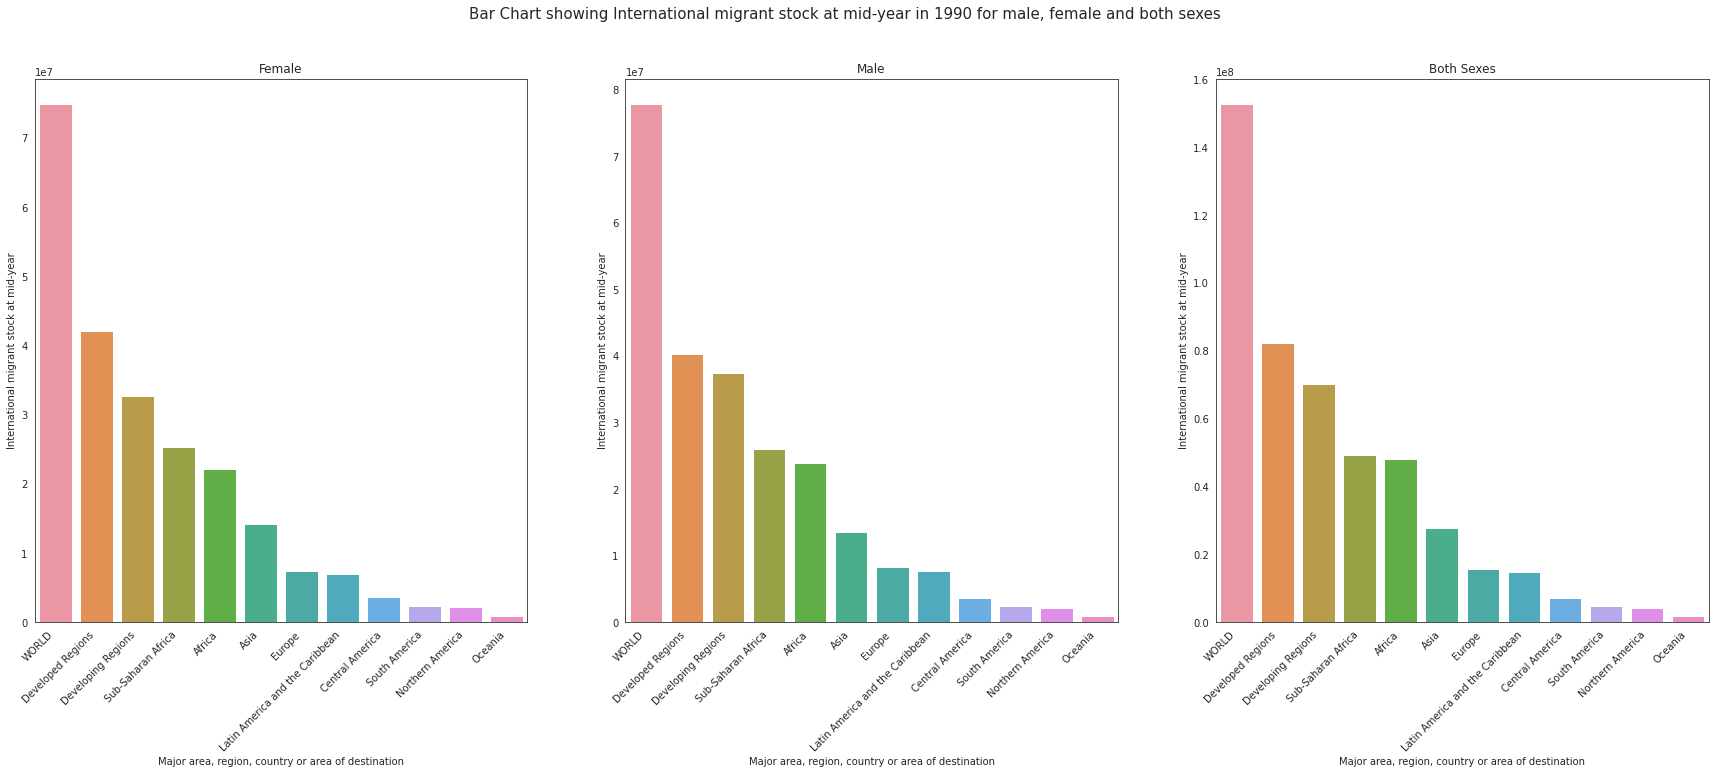

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [1198]:
#@title International migrant stock at mid-year by major areas and gender in 1990 2000 and 2010
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (30, 10))
fig.suptitle('Bar Chart showing International migrant stock at mid-year in 1990 for male, female and both sexes', fontsize = 15)
x = ['WORLD', 'Developed Regions', 'Developing Regions', 'Sub-Saharan Africa', 'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
'Central America', 'South America', 'Northern America', 'Oceania'] 

axs[0].set_title('Female')
figure(num = None, figsize = (20,10), dpi = 80)
sns.barplot(x = selected_areas_1990_female['Major area, region, country or area of destination'], 
            y = selected_areas_1990_female['International migrant stock at mid-year'], ax = axs[0])
axs[0].set_xticklabels(x, rotation = 45, ha = 'right')


axs[1].set_title('Male')
figure(num = None, figsize = (20,10), dpi = 80)
sns.barplot(x = selected_areas_1990_male['Major area, region, country or area of destination'], 
            y = selected_areas_1990_male['International migrant stock at mid-year'], ax = axs[1])
axs[1].set_xticklabels(x, rotation = 45, ha = 'right')

axs[2].set_title('Both Sexes')
figure(num = None, figsize = (20,10), dpi = 50)
sns.barplot(x = selected_areas_1990_bothsexes['Major area, region, country or area of destination'], 
            y = selected_areas_1990_bothsexes['International migrant stock at mid-year'], ax = axs[2])
axs[2].set_xticklabels(x, rotation = 45, ha = 'right')



[Text(0, 0, 'WORLD'),
 Text(0, 0, 'Developed Regions'),
 Text(0, 0, 'Developing Regions'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Africa'),
 Text(0, 0, 'Asia'),
 Text(0, 0, 'Europe'),
 Text(0, 0, 'Latin America and the Caribbean'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Northern America'),
 Text(0, 0, 'Oceania')]

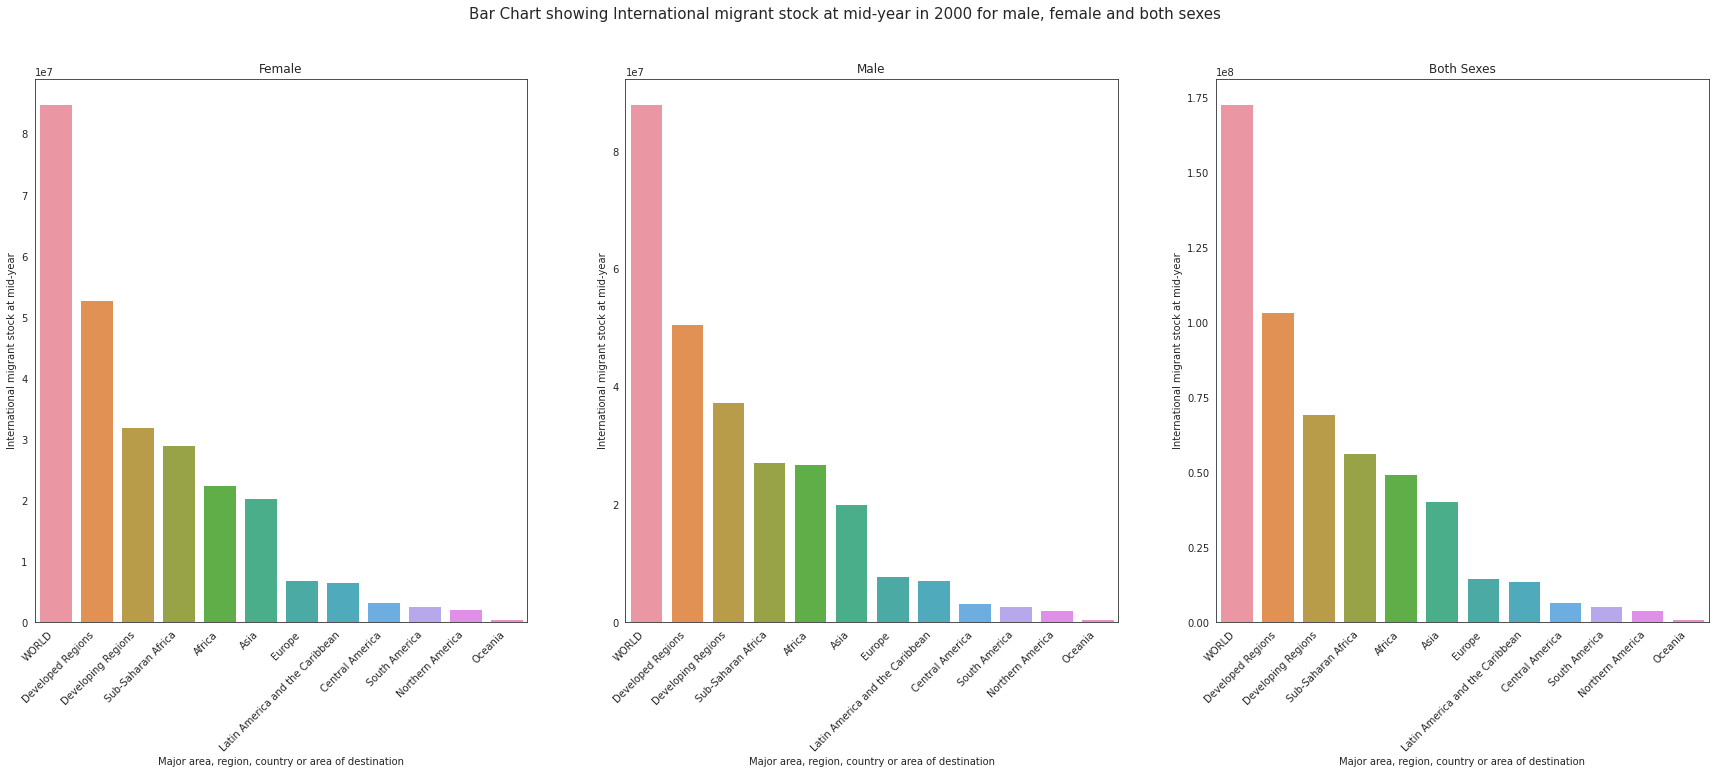

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [1199]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (30, 10))
fig.suptitle('Bar Chart showing International migrant stock at mid-year in 2000 for male, female and both sexes', fontsize = 15)
x = ['WORLD', 'Developed Regions', 'Developing Regions', 'Sub-Saharan Africa', 'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
'Central America', 'South America', 'Northern America', 'Oceania'] 

axs[0].set_title('Female')
figure(num = None, figsize = (20,10), dpi = 80)
sns.barplot(x = selected_areas_2000_female['Major area, region, country or area of destination'], 
            y = selected_areas_2000_female['International migrant stock at mid-year'], ax = axs[0])
axs[0].set_xticklabels(x, rotation = 45, ha = 'right')


axs[1].set_title('Male')
figure(num = None, figsize = (20,10), dpi = 80)
sns.barplot(x = selected_areas_2000_male['Major area, region, country or area of destination'], 
            y = selected_areas_2000_male['International migrant stock at mid-year'], ax = axs[1])
axs[1].set_xticklabels(x, rotation = 45, ha = 'right')

axs[2].set_title('Both Sexes')
figure(num = None, figsize = (20,10), dpi = 50)
sns.barplot(x = selected_areas_1990_bothsexes['Major area, region, country or area of destination'], 
            y = selected_areas_2000_bothsexes['International migrant stock at mid-year'], ax = axs[2])
axs[2].set_xticklabels(x, rotation = 45, ha = 'right')

[Text(0, 0, 'WORLD'),
 Text(0, 0, 'Developed Regions'),
 Text(0, 0, 'Developing Regions'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Africa'),
 Text(0, 0, 'Asia'),
 Text(0, 0, 'Europe'),
 Text(0, 0, 'Latin America and the Caribbean'),
 Text(0, 0, 'Central America'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Northern America'),
 Text(0, 0, 'Oceania')]

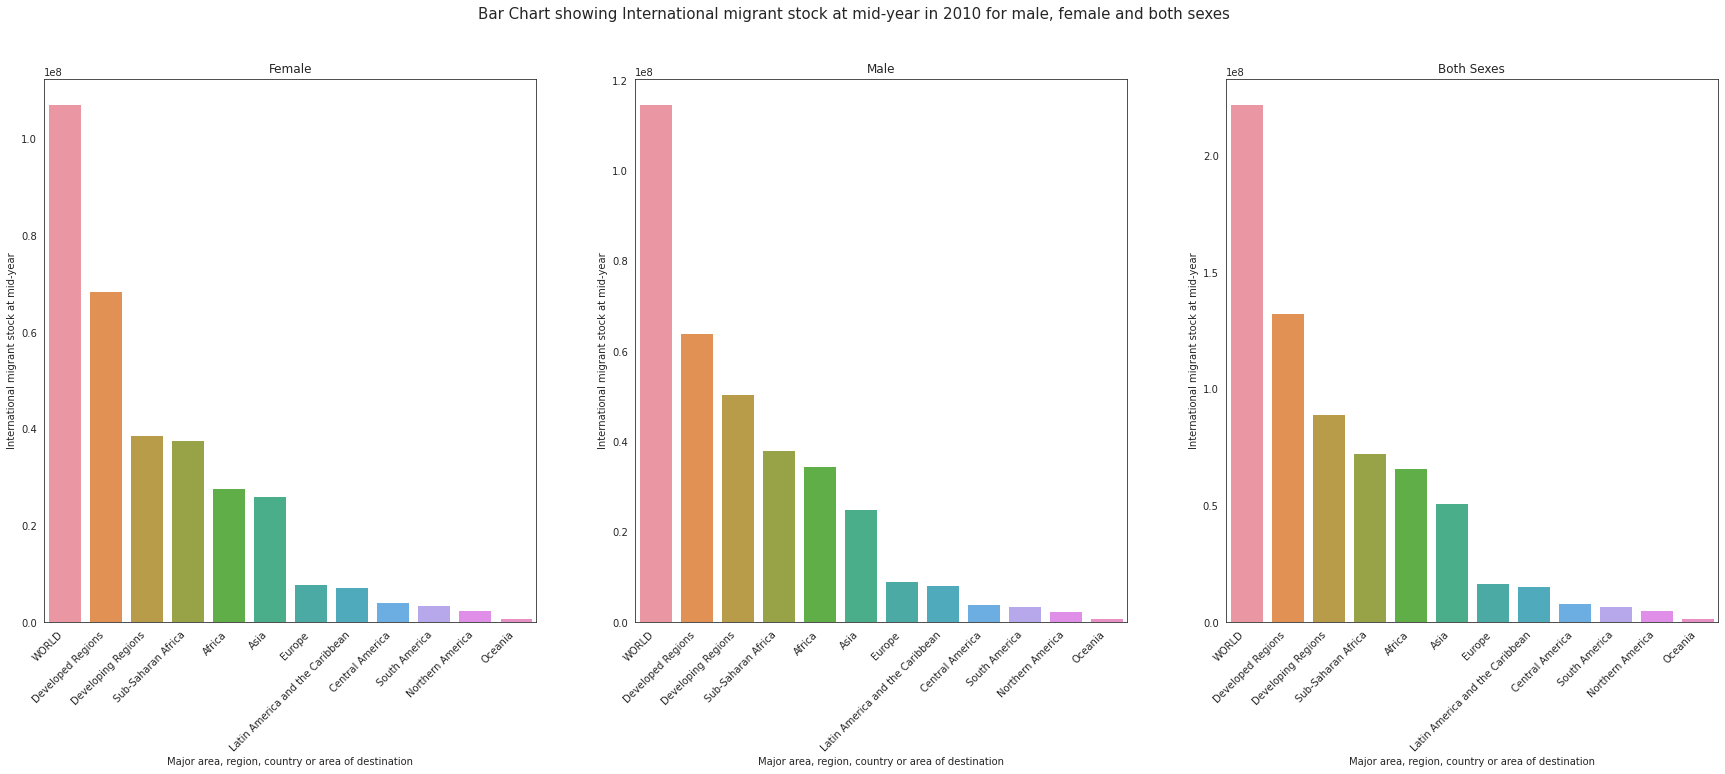

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [1200]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (30, 10))
fig.suptitle('Bar Chart showing International migrant stock at mid-year in 2010 for male, female and both sexes', fontsize = 15)
x = ['WORLD', 'Developed Regions', 'Developing Regions', 'Sub-Saharan Africa', 'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
'Central America', 'South America', 'Northern America', 'Oceania'] 

axs[0].set_title('Female')
figure(num = None, figsize = (20,10), dpi = 80)
sns.barplot(x = selected_areas_2010_female['Major area, region, country or area of destination'], 
            y = selected_areas_2010_female['International migrant stock at mid-year'], ax = axs[0])
axs[0].set_xticklabels(x, rotation = 45, ha = 'right')


axs[1].set_title('Male')
figure(num = None, figsize = (20,10), dpi = 80)
sns.barplot(x = selected_areas_2010_male['Major area, region, country or area of destination'], 
            y = selected_areas_2010_male['International migrant stock at mid-year'], ax = axs[1])
axs[1].set_xticklabels(x, rotation = 45, ha = 'right')

axs[2].set_title('Both Sexes')
figure(num = None, figsize = (20,10), dpi = 50)
sns.barplot(x = selected_areas_2010_bothsexes['Major area, region, country or area of destination'], 
            y = selected_areas_2010_bothsexes['International migrant stock at mid-year'], ax = axs[2])
axs[2].set_xticklabels(x, rotation = 45, ha = 'right')

In [1201]:
#@title 


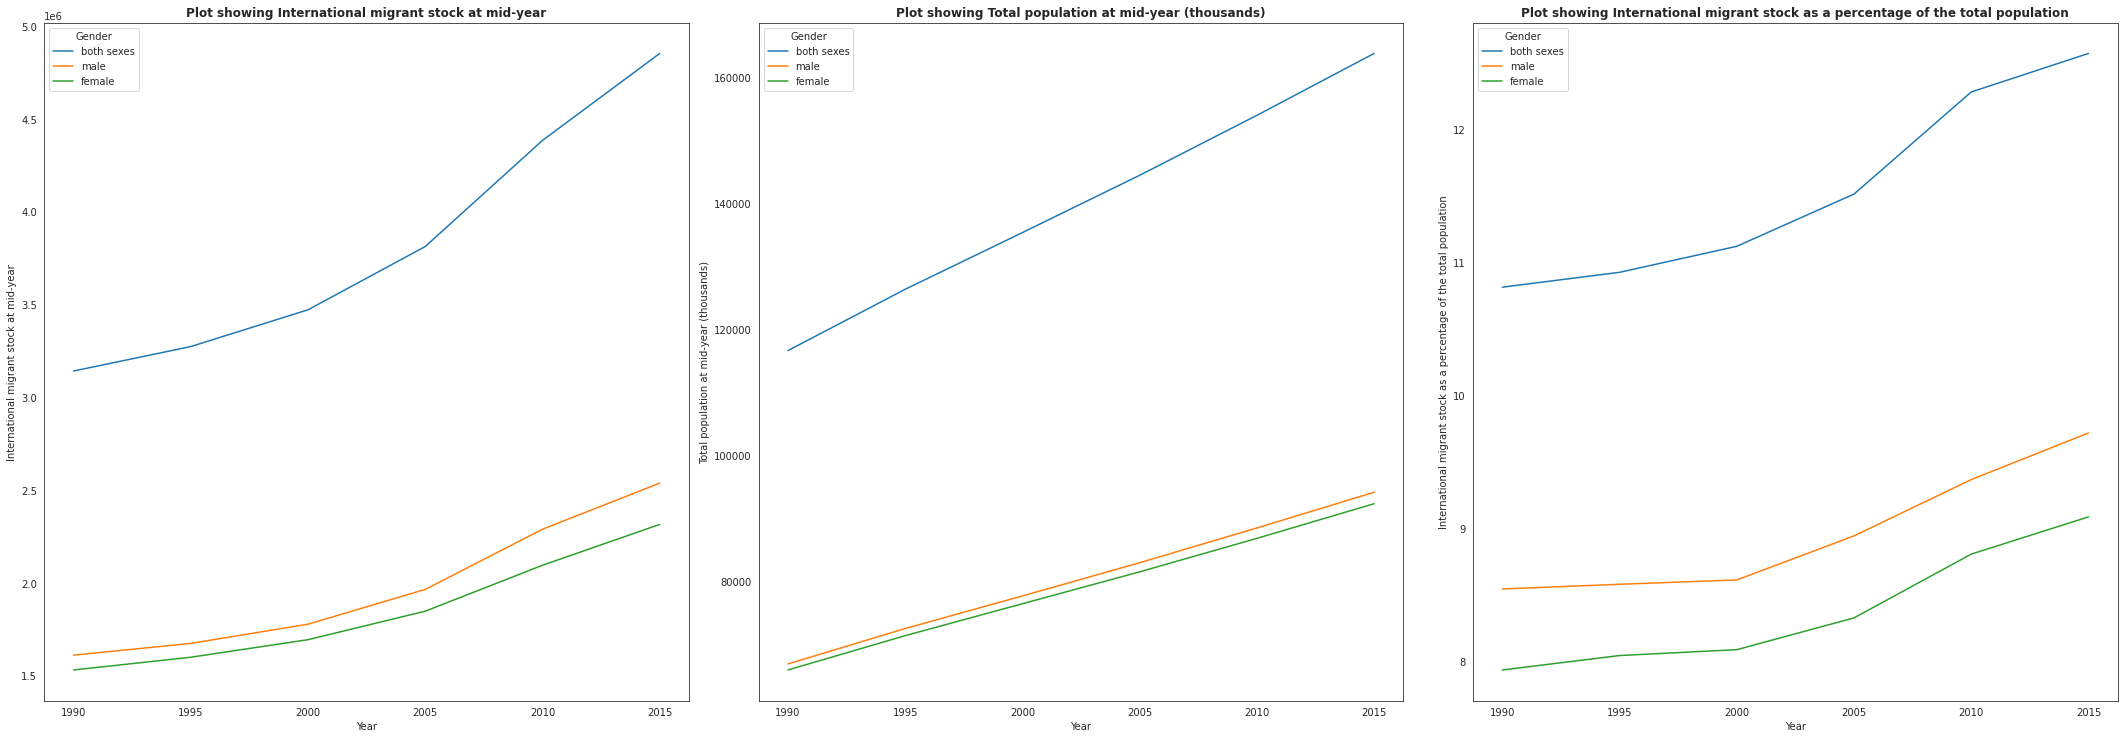

In [1235]:
sns.set_style('white')

f, ax = plt.subplots(1, 3, figsize=(30,10))


ax[0].set_title('Plot showing International migrant stock at mid-year',fontweight="bold")
ax[0].set_ylabel('International migrant stock at mid-year')
sns.lineplot(y="International migrant stock at mid-year", x="Year", hue = "Gender", estimator = "mean", ci=None, data=tb_1, ax=ax[0])

ax[1].set_title('Plot showing Total population at mid-year (thousands)',fontweight="bold")
ax[1].set_ylabel('Total population at mid-year (thousands)')
sns.lineplot(y="Total population of both sexes at mid-year (thousands)", x="Year", hue = "Gender", estimator = "mean", ci=None, data=tb_2, ax=ax[1])

ax[2].set_title('Plot showing International migrant stock as a percentage of the total population',fontweight="bold")
ax[2].set_ylabel('International migrant stock as a percentage of the total population')
sns.lineplot(y="International migrant stock as a percentage of the total population", x="Year", hue = "Gender", estimator = "mean", ci=None, data=tb_3, ax=ax[2])


f.tight_layout()
f.subplots_adjust(top=1)
plt.show()

In [1203]:
tb_1_female_1990 

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,International migrant stock at mid-year
3180,1,WORLD,NaN,900,NaN,female,1990,74815702.0
3181,2,Developed regions,(b),901,NaN,female,1990,42115231.0
3182,3,Developing regions,(c),902,NaN,female,1990,32700471.0
3183,4,Least developed countries,(d),941,NaN,female,1990,5236216.0
3184,5,Less developed regions excluding least develop...,NaN,934,NaN,female,1990,27464255.0
...,...,...,...,...,...,...,...,...
3440,261,Samoa,NaN,882,B,female,1990,1586.0
3441,262,Tokelau,NaN,772,B,female,1990,120.0
3442,263,Tonga,NaN,776,B,female,1990,1423.0
3443,264,Tuvalu,NaN,798,C,female,1990,138.0


In [1204]:
#@title tb_3 re-cleaning for chart 


In [1205]:

tb_3_male_1990 = tb_3[(tb_3["Gender"] == "male") & (tb_3["Year"] == "1990")]
tb_3_bothsex_1990 = tb_3[(tb_3["Gender"] == "both sexes") & (tb_3["Year"] == "1990")]
tb_3_female_1990 = tb_3[(tb_3["Gender"] == "female") & (tb_3["Year"] == "1990")]

tb_3_female_2000 = tb_3[(tb_3["Gender"] == "female") & (tb_3["Year"] == "2000")]
tb_3_male_2000 = tb_3[(tb_3["Gender"] == "male") & (tb_3["Year"] == "1990")]
tb_3_bothsex_2000 = tb_3[(tb_3["Gender"] == "both sexes") & (tb_3["Year"] == "2000")]

tb_3_female_2010 = tb_3[(tb_3["Gender"] == "female") & (tb_3["Year"] == "2010")]
tb_3_male_2010 = tb_3[(tb_3["Gender"] == "male") & (tb_3["Year"] == "2010")]
tb_3_bothsex_2010 = tb_3[(tb_3["Gender"] == "both sexes") & (tb_3["Year"] == "2010")]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


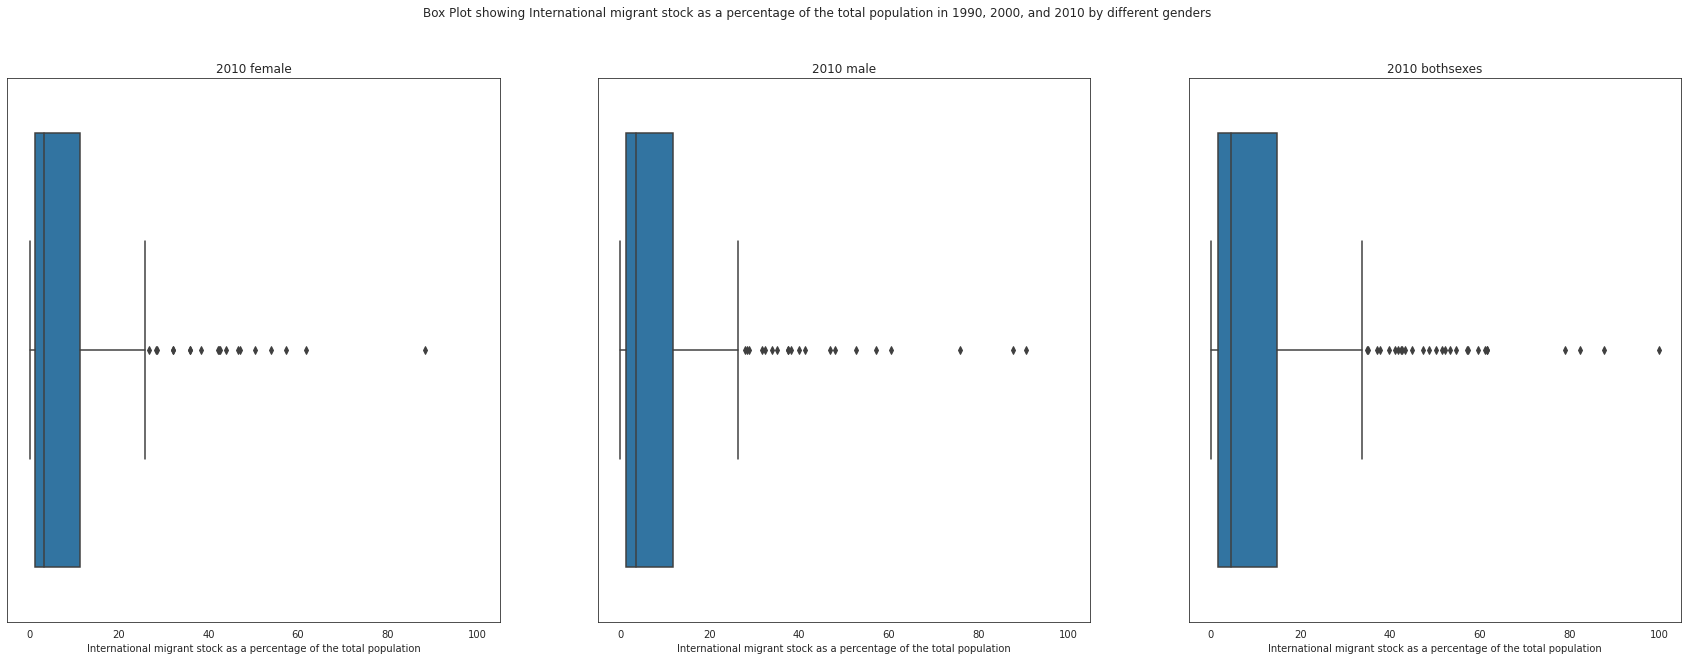

In [1228]:
#@title 'International migrant stock as a percentage of the total population' in 2010, subplots 
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (30,10))



ax[0].set_title('2010 female')
sns.boxplot(tb_3_female_2010['International migrant stock as a percentage of the total population'], ax = ax[0])

ax[1].set_title('2010 male')
sns.boxplot(tb_3_male_2010['International migrant stock as a percentage of the total population'], ax = ax[1])

ax[2].set_title('2010 bothsexes')
sns.boxplot(tb_3_bothsex_2010['International migrant stock as a percentage of the total population'], ax = ax[2])

fig.suptitle('Box Plot showing International migrant stock as a percentage of the total population in 2010 by different genders')
plt.show()

In [1207]:
#@title tb_1 re-cleaning for chart


In [1208]:
#@title International migrant stock at mid-year in 1990 by major areas
tb_1_World_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_Developedregions_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Developed regions") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_Developingregions_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Developing regions") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_Africa_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Africa") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_Asia_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Asia") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_Europe_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Europe") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_LatinAmericaandheCaribbean_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Latin America and the Caribbean") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_Oceania_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Oceania") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_NorthernAmerica_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "Northern America") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]


tb_1_World_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_Developedregions_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Developed regions") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_Developingregions_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Developing regions") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_Africa_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Africa") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_Asia_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Asia") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_Europe_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Europe") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_LatinAmericaandheCaribbean_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Latin America and the Caribbean") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_Oceania_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Oceania") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_NorthernAmerica_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "Northern America") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]

tb_1_World_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_Developedregions_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Developed regions") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_Developingregions_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Developing regions") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_Africa_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Africa") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_Asia_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Asia") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_Europe_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Europe") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_LatinAmericaandheCaribbean_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Latin America and the Caribbean") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_Oceania_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Oceania") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_NorthernAmerica_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "Northern America") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]



 

In [1230]:
#@title International migrant stock at mid-year from 1990 to 2015, worldwide by sex
tb_1_World_1990_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "male")]
tb_1_World_1995_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1995") & (tb_1["Gender"] == "male")]
tb_1_World_2000_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2000") & (tb_1["Gender"] == "male")]
tb_1_World_2005_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2005") & (tb_1["Gender"] == "male")]
tb_1_World_2010_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2010") & (tb_1["Gender"] == "male")]
tb_1_World_2015_male = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2015") & (tb_1["Gender"] == "male")]

tb_1_World_1990_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "female")]
tb_1_World_1995_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1995") & (tb_1["Gender"] == "female")]
tb_1_World_2000_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2000") & (tb_1["Gender"] == "female")]
tb_1_World_2005_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2005") & (tb_1["Gender"] == "female")]
tb_1_World_2010_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2010") & (tb_1["Gender"] == "female")]
tb_1_World_2015_female = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2015") & (tb_1["Gender"] == "female")]


tb_1_World_1990_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1990") & (tb_1["Gender"] == "both sexes")]
tb_1_World_1995_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "1995") & (tb_1["Gender"] == "both sexes")]
tb_1_World_2000_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2000") & (tb_1["Gender"] == "both sexes")]
tb_1_World_2005_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2005") & (tb_1["Gender"] == "both sexes")]
tb_1_World_2010_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2010") & (tb_1["Gender"] == "both sexes")]
tb_1_World_2015_bothsexes = tb_1[(tb_1["Major area, region, country or area of destination"] == "WORLD") & (tb_1["Year"] == "2015") & (tb_1["Gender"] == "both sexes")]

tb_1_World_male = pd.concat([tb_1_World_1990_male,tb_1_World_1995_male,tb_1_World_2000_male,tb_1_World_2005_male,tb_1_World_2010_male,tb_1_World_2015_male],axis=0,ignore_index=False)



In [1231]:
tb_6_E3_drop

,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),TimePeriod,Annual rate of change of the refugee stock
0,1,WORLD,NaN,900,NaN,1990-1995,-2.123497
1,2,Developed regions,(b),901,NaN,1990-1995,9.388424
2,3,Developing regions,(c),902,NaN,1990-1995,-2.839417
3,4,Least developed countries,(d),941,NaN,1990-1995,-0.680327
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-4.383600
...,...,...,...,...,...,...,...
1320,261,Samoa,NaN,882,B,2010-2015,NaN
1321,262,Tokelau,NaN,772,B,2010-2015,NaN
1322,263,Tonga,NaN,776,B,2010-2015,NaN
1323,264,Tuvalu,NaN,798,C,2010-2015,NaN


Text(0, 0.5, 'Annual rate of change of the refugee stock')

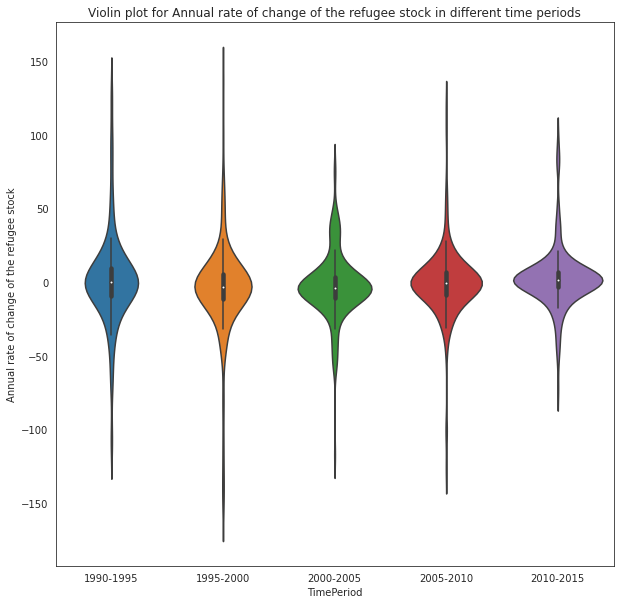

In [1236]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Violin plot for Annual rate of change of the refugee stock in different time periods')
sns.violinplot(y = 'Annual rate of change of the refugee stock', x = 'TimePeriod',  data = tb_6_E3_drop)
plt.ylabel('Annual rate of change of the refugee stock')

In [1217]:
tb_6_E1_drop
tb_6_E1_drop.reset_index()

,index,Sort order,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Gender,Year,Estimated refugee stock at mid-year (both sexes)
0,0,1,WORLD,NaN,900,NaN,both sexes,1990,18836571.0
1,1,2,Developed regions,(b),901,NaN,both sexes,1990,2014564.0
2,2,3,Developing regions,(c),902,NaN,both sexes,1990,16822007.0
3,3,4,Least developed countries,(d),941,NaN,both sexes,1990,5048391.0
4,4,5,Less developed regions excluding least develop...,NaN,934,NaN,both sexes,1990,11773616.0
...,...,...,...,...,...,...,...,...,...
1585,1585,261,Samoa,NaN,882,B,both sexes,2015,0.0
1586,1586,262,Tokelau,NaN,772,B,both sexes,2015,0.0
1587,1587,263,Tonga,NaN,776,B,both sexes,2015,0.0
1588,1588,264,Tuvalu,NaN,798,C,both sexes,2015,0.0


Text(0.5, 0.98, 'Scatter plot showing the relationship between Estimated refugee stock and Total population')

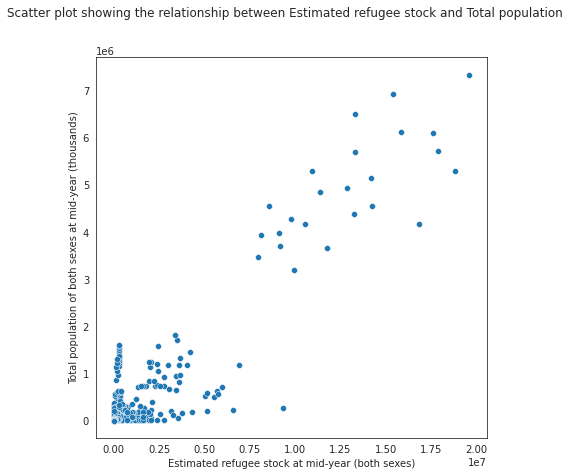

In [1245]:

plt.figure(figsize = (7, 7))
sns.scatterplot(x = tb_6_E1_drop['Estimated refugee stock at mid-year (both sexes)'], 
                y = tb_2['Total population of both sexes at mid-year (thousands)'])

plt.suptitle('Scatter plot showing the relationship between Estimated refugee stock and Total population')